In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#all graphics we create will appear in notebook with this code below
%matplotlib inline

In [2]:
#Set data. Also make sure to let closed_dates be the appropriate data type
data = pd.read_csv('DSNY_Graffiti_Tracking.csv', parse_dates=['CLOSED_DATE'])
#Lets preview the data
data.head()

,INCIDENT_ADDRESS,BOROUGH,COMMUNITY_BOARD,POLICE_PRECINCT,CITY_COUNCIL_DISTRICT,BBL,CREATED_DATE,STATUS,RESOLUTION_ACTION,CLOSED_DATE,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,ZIP_CODE,CENSUS_TRACT,BIN,NTA,LOCATION
0,1183-flatbush-ave 1183-flatbush-ave,BROOKLYN,Unspecified BROOKLYN,Unspecified,NaN,NaN,12/20/2019,Open,Property Research Required,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,119-01 NOSTRAND AVENUE,QUEENS,Unspecified QUEENS,Unspecified,NaN,NaN,01/14/2019,Open,Property Research Required,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,BROOKLYN,Unspecified BROOKLYN,Unspecified,NaN,NaN,12/20/2019,Open,Property Research Required,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,47 47 road,QUEENS,Unspecified QUEENS,Unspecified,NaN,NaN,01/29/2019,Open,Property Research Required,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1702/ 86 ST,BROOKLYN,Unspecified BROOKLYN,Unspecified,NaN,NaN,01/01/2020,Open,Property Research Required,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**First thing to note is that a lot of variables are Unspecified(Police_precint column) or NaN (City_council_district, BBL, XYcoordinates, lattitude, longitude, zipcode)**

In [3]:
data.BOROUGH.value_counts()

BROOKLYN         10077
MANHATTAN         5149
BRONX             3742
QUEENS            2855
STATEN ISLAND      305
Unspecified         12
Name: BOROUGH, dtype: int64

**Above you can see that there are 12 unspecified Borough locations. Since 12 is a small number compared to the 20,000+ data points we have I believe eliminating those data points wouldn't change the analysis very much**

Text(0.5, 0, 'Borough')

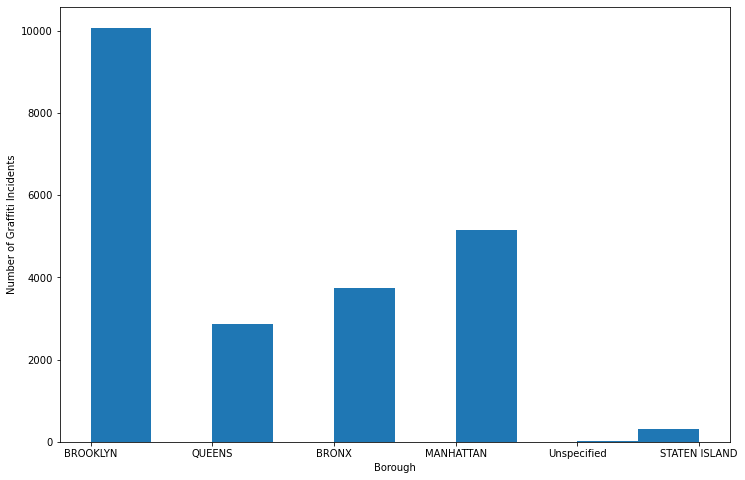

In [4]:
#Make initial figure just to get better feel of data
fig = plt.figure(figsize = (12,8))
axes = fig.add_subplot(1,1,1)
#(#rows, #col, #which one)
ax_0 = plt.hist(data.BOROUGH)
plt.ylabel('Number of Graffiti Incidents')
plt.xlabel('Borough')

**Above you can see that most graffiti incidents occur in Brooklyn and least in Staten Island. My question here is what are the populations of these areas? Maybe our second dataset can answer this question**

In [5]:
#fig.add_subplot(1,1,2).scatter(data.X_COORDINATE, data.Y_COORDINATE)

Timestamp('2012-10-29 00:00:00')

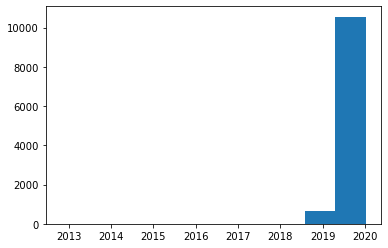

In [6]:
plt.hist(data.CLOSED_DATE)
data.CLOSED_DATE.max()
data.CLOSED_DATE.min()

In [7]:
x_coor_null_num = data['X_COORDINATE'].isnull().sum()
y_coor_null_num = data['Y_COORDINATE'].isnull().sum()
print("There are ", x_coor_null_num, "missing x coordinates and", y_coor_null_num, "missing y coordinates")

There are  1345 missing x coordinates and 1345 missing y coordinates


In [8]:
#data.index.size * data.columns.size == data.size
print("The size of the data without the XY NaN coordinates is", data.size)
print("This means we still have",(data.size) * 100 / (data.size + x_coor_null_num),"% of the original data size data")

The size of the data without the XY NaN coordinates is 420660
This means we still have 99.68128339711615 % of the original data size data


**Since we still have most of our data we can safetely drop the NaN coordinate values. One thing to keep in mind is if the NaN values we dropped were randomly distributed on all boroughs or if they were somehow all concentrated on one or two.**

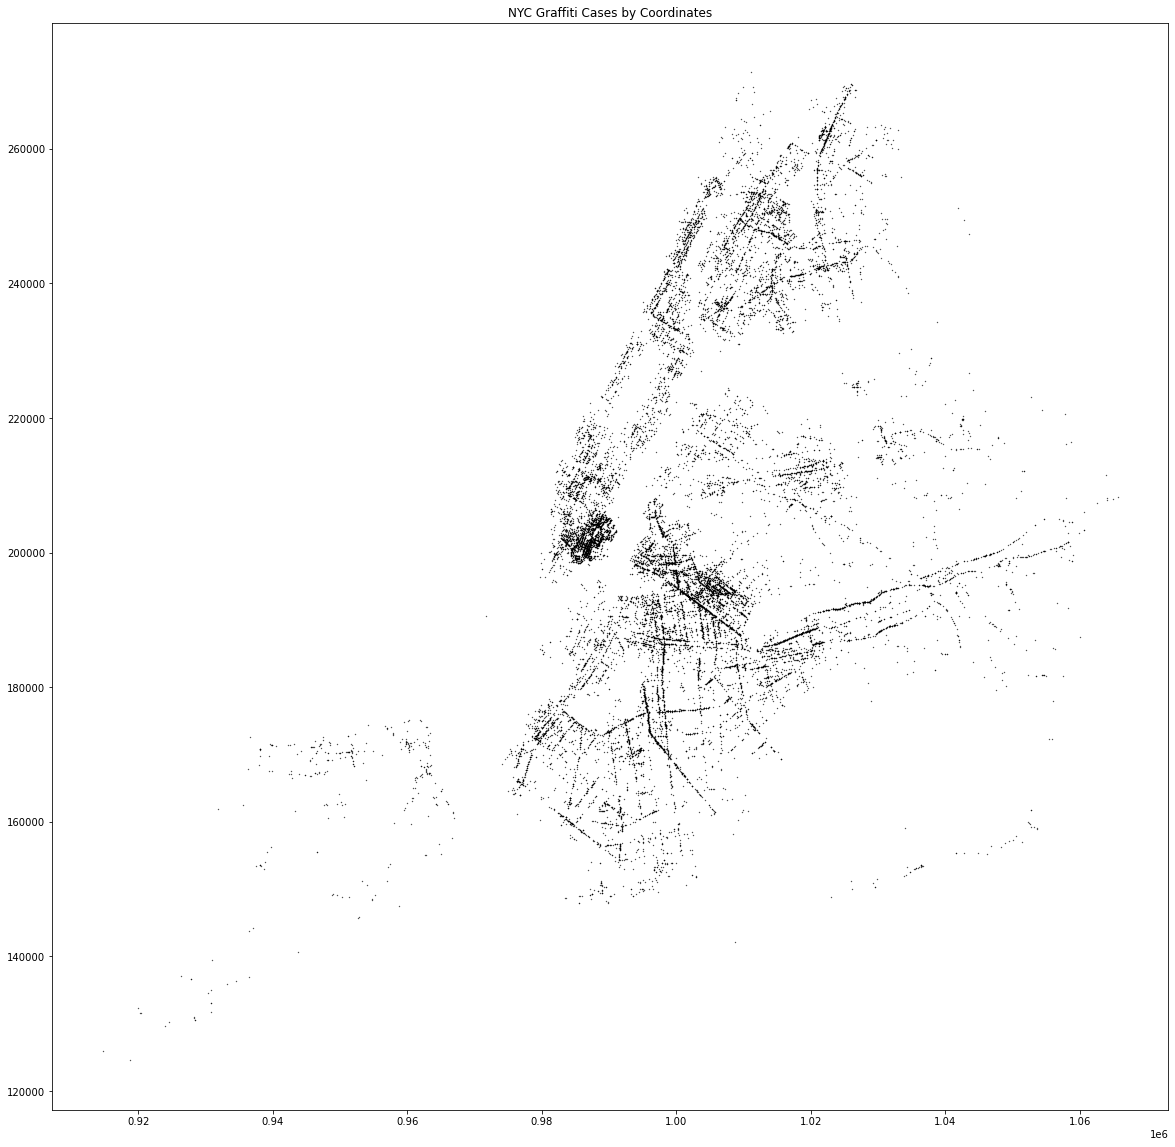

In [9]:
#data.plot.scatter(x="X_COORDINATE",y="Y_COORDINATE", s = .001, c = ['black'] )
plt.figure(figsize=(20,20))
plt.scatter(data.X_COORDINATE, data.Y_COORDINATE, s=.1, c='black')
plt.title("NYC Graffiti Cases by Coordinates")
plt.show()

**Above illustrates a visual of where the graffiti is being placed in NYC. As you can see there is a dense concentration towards the center and very little left and down of the graph. Below is a population heatmap of NYC in 2015 for comparison**

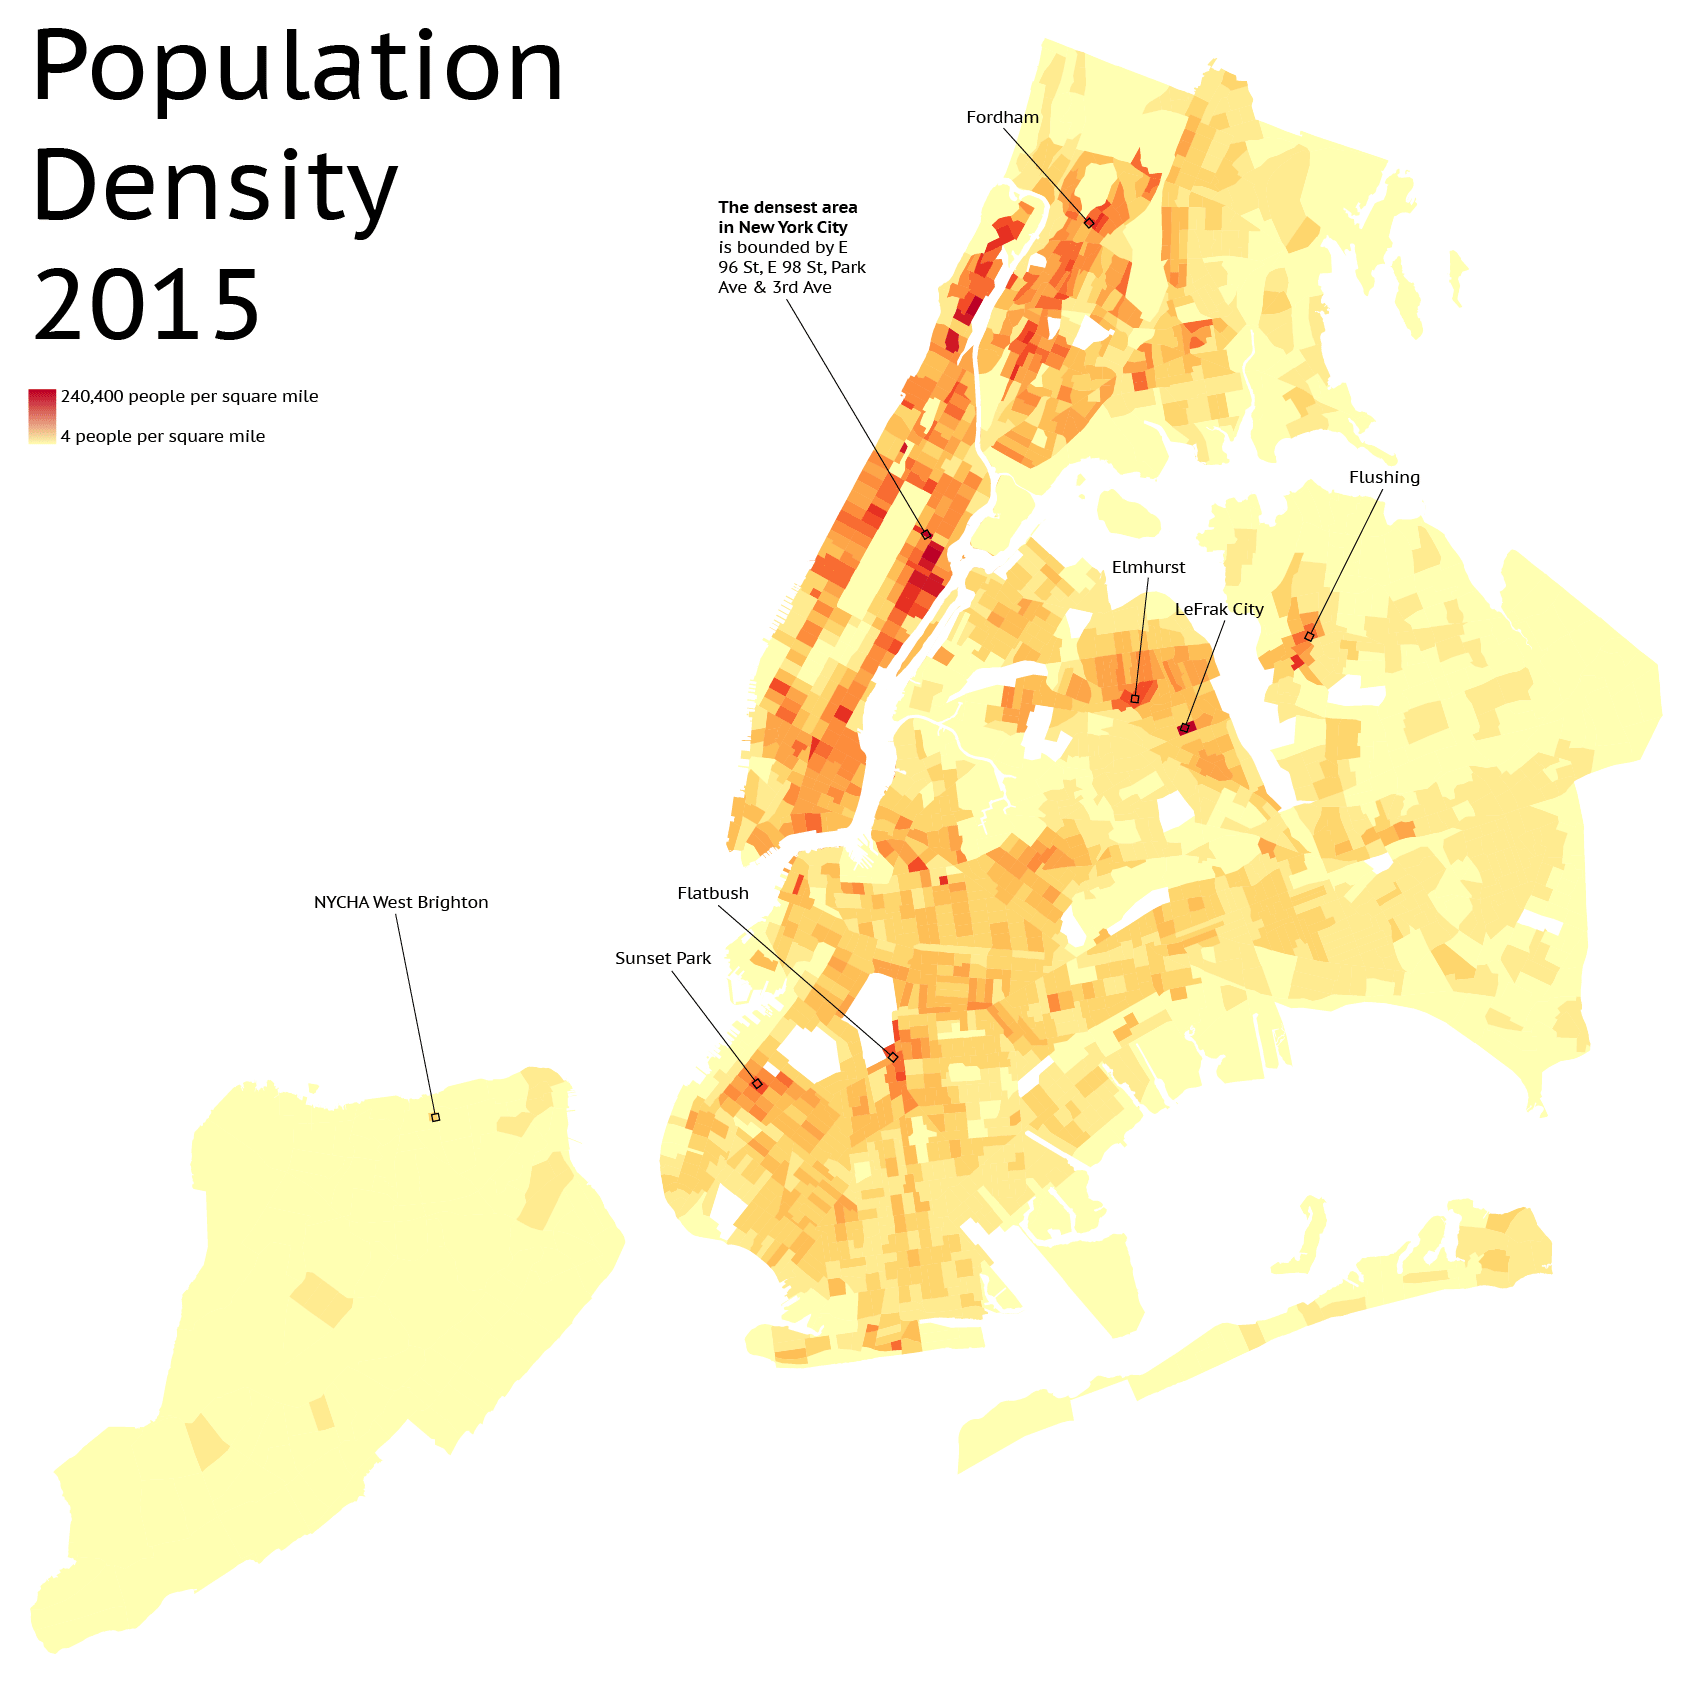

## Geographic Analysis

First, we inspect the zip code series in the dataframe in order to see what kind of data is inside.

In [10]:
data.ZIP_CODE

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
22135    10455.0
22136    11203.0
22137    10001.0
22138    11216.0
22139    10468.0
Name: ZIP_CODE, Length: 22140, dtype: float64

We want to see how much of the data is null, not null, and unique.

In [11]:
np.sum(data.ZIP_CODE.isnull()), len(data.ZIP_CODE), len(data['ZIP_CODE'].unique())

(1377, 22140, 184)

It appears that a non significant amount of data is null, so we continue with analysis on the not null data

In [12]:
zip_code = data[~data.ZIP_CODE.isnull()]

Then, we will aggregate by zip code and identify the zip codes with the highest number of graffiti incidences.

In [13]:
zip_code_count = zip_code.groupby('ZIP_CODE').count().rename(columns={'BBL':'count'}).loc[:,['count']].sort_values(by='count', ascending=False)
zip_code_count.head()

,count
ZIP_CODE,
10002.0,808
11237.0,776
11206.0,745
11221.0,712
11211.0,563


Now let's take a look at the distribution of graffiti incidences.

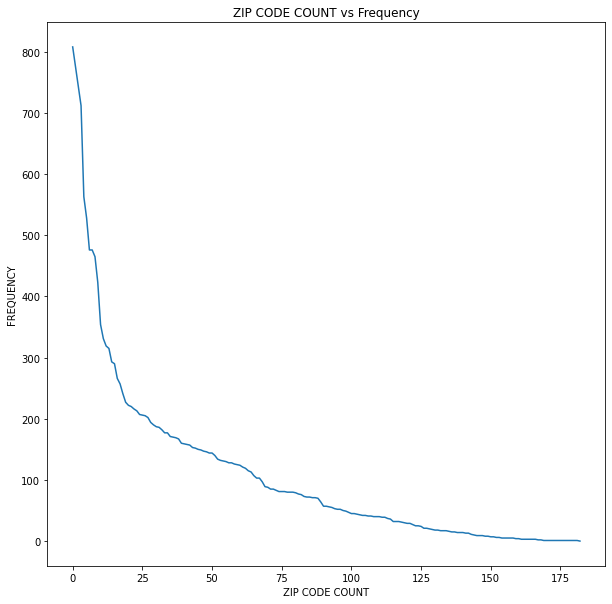

In [14]:
plt.figure(figsize=(10,10))
plt.xlabel("ZIP CODE COUNT")
plt.ylabel("FREQUENCY")
plt.title("ZIP CODE COUNT vs Frequency");
plt.plot(np.arange(0, len(zip_code_count)), zip_code_count['count']);

We can note that the majority of graffiti incidences occur in roughly quarter of our zip codes. More formally:

In [15]:
percentile_25 = len(zip_code_count)//4
sum(zip_code_count.iloc[:percentile_25]['count'])/sum(zip_code_count['count'])

0.6713366904322681

In [16]:
percentile_25

45

It appears that 67% of graffiti incidences happen in 45 zip codes!

## Borough Analysis


Now let's take a look at boroughs and investigate any patterns. We can see what values borough takes:

In [17]:
data.BOROUGH.unique()

array(['BROOKLYN', 'QUEENS', 'BRONX', 'MANHATTAN', 'Unspecified',
       'STATEN ISLAND'], dtype=object)

Now take our histogram from before:

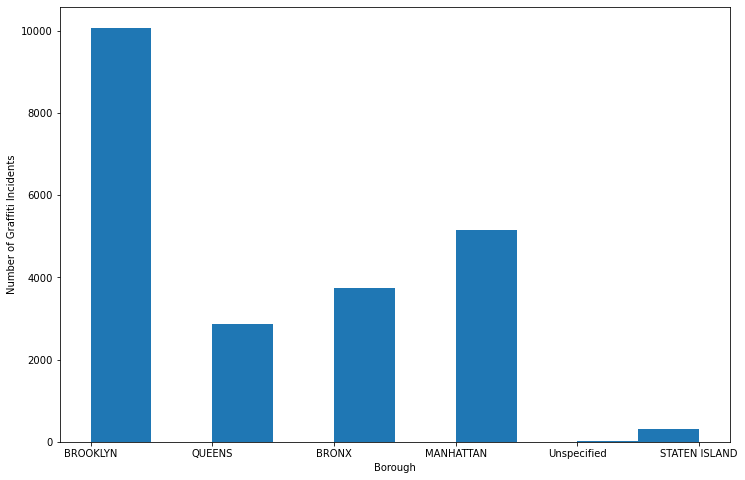

In [18]:
fig = plt.figure(figsize = (12,8))
axes = fig.add_subplot(1,1,1)

ax_0 = plt.hist(data.BOROUGH)
plt.ylabel('Number of Graffiti Incidents')
plt.xlabel('Borough');

## Time Series Analysis by Borough

Now let's combine our analysis of boroughs and see if there are any trends over time. First, we need to inspect our date data, which ranges from each day of 2019.

In [19]:
len(data['CREATED_DATE'].unique()), min(data['CREATED_DATE'].unique()), max(data['CREATED_DATE'].unique())

(365, '01/01/2020', '12/31/2019')

Let's aggregate by month instead of day, as the granularity of our data is by day. We can use `extract` and regular expressions to create a column with just the month number.

In [20]:
data['MONTH'] = data['CREATED_DATE'].str.extract('(\d\d)/')[0]

Now, let's plot for each borough. This requires data for each borough and their count.

In [21]:
brooklyn = data[data['BOROUGH'] == 'BROOKLYN'].groupby("MONTH").count().rename(columns={'BBL':'count'})
queens = data[data['BOROUGH'] == 'QUEENS'].groupby("MONTH").count().rename(columns={'BBL':'count'})
bronx = data[data['BOROUGH'] == 'BRONX'].groupby("MONTH").count().rename(columns={'BBL':'count'})
manhattan = data[data['BOROUGH'] == 'MANHATTAN'].groupby("MONTH").count().rename(columns={'BBL':'count'})
staten_island = data[data['BOROUGH'] == 'STATEN ISLAND'].groupby("MONTH").count().rename(columns={'BBL':'count'})

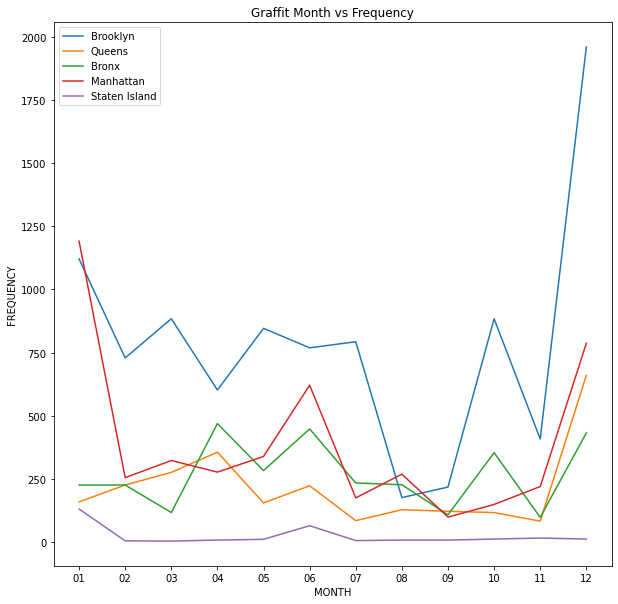

In [22]:
plt.figure(figsize=(10,10))
plt.plot(brooklyn.index, brooklyn['count'])
plt.plot(queens.index, queens['count'])
plt.plot(bronx.index, bronx['count'])
plt.plot(manhattan.index, manhattan['count'])
plt.plot(staten_island.index, staten_island['count'])

plt.legend(['Brooklyn', 'Queens', 'Bronx', 'Manhattan', 'Staten Island'])
plt.xlabel("MONTH")
plt.ylabel("FREQUENCY")
plt.title("Graffit Month vs Frequency");

It looks like graffiti incidences are high around the end/beginning of the year. This may be because of reporting biases from police / citizens, or because of seasonal factors (weather, holidays). We can also see that Brooklyn has the highest occurance of graffiti incidences overall, and compare proportional differences between the boroughs. While it may not be the best type of graph, we can use a stack plot to demonstrate how severe Brooklyn outweighs other boroughs.

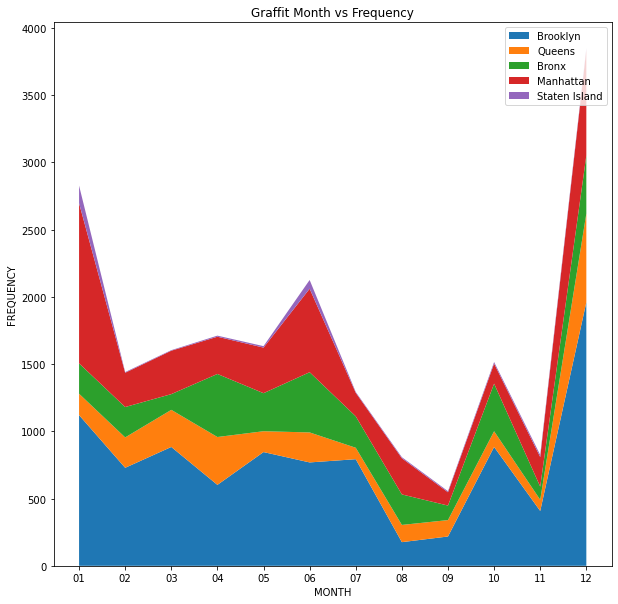

In [23]:
plt.figure(figsize=(10,10))
plt.stackplot(brooklyn.index, brooklyn['count'], queens['count'], bronx['count'], manhattan['count'], staten_island['count'])

plt.legend(['Brooklyn', 'Queens', 'Bronx', 'Manhattan', 'Staten Island'])
plt.xlabel("MONTH")
plt.ylabel("FREQUENCY")
plt.title("Graffit Month vs Frequency");

## City Response Analysis

Next, we'll analyze how fast a district was able to respond to a graffiti case. We need to inspect the `CREATED_DATE` and `CLOSED_DATE` series, as well as create a new series to store how long it took to close the case.

In [24]:
np.sum(data['CREATED_DATE'].isnull())

0

In [25]:
closed = data['CLOSED_DATE'].isnull()
np.sum(closed)

10949

We can see that all the data has a created date, but only half of the cases have been closed. Let's see how many cases were closed in each borough.

In [26]:
not_closed_borough = data[closed].groupby("BOROUGH").count().rename(columns={'INCIDENT_ADDRESS':'count'}).loc[:,['count']]

To find the proportion, we need to divide that value by the total number of cases for each borough.

In [27]:
total_borough = data.groupby("BOROUGH").count().rename(columns={'INCIDENT_ADDRESS':'count'}).loc[:,['count']]

In [28]:
total_borough['proportion of not closed'] = not_closed_borough['count'] / total_borough['count']
total_borough['not closed'] = not_closed_borough['count']
total_borough = total_borough.sort_values(by='proportion of not closed', ascending=False)

In [29]:
total_borough

,count,proportion of not closed,not closed
BOROUGH,,,
Unspecified,12,1.000000,12
BRONX,3742,0.526724,1971
QUEENS,2855,0.518389,1480
MANHATTAN,5149,0.485920,2502
BROOKLYN,10076,0.484418,4881
STATEN ISLAND,305,0.334426,102


It appears that Bronx has the highest proportion of unclosed cases with Queens close behind. They all generally have a 50% close rate, but Staten Island is certainly an outlier with only 33% of their cases still not closed.

Now let's see the response times for each borough. We have a `CREATED_DATE` and `CLOSED_DATE` series for each entry. Let's only inspect the data with closed cases now. We will also convert `CREATED_DATE` to a datetime type and compute the response time as well.

In [30]:
closed_data = data[~data['CLOSED_DATE'].isnull()]
closed_data['CREATED_DATE_DT'] = pd.to_datetime(closed_data['CREATED_DATE'])
closed_data['RESPONSE TIME'] = (closed_data['CLOSED_DATE'] - closed_data['CREATED_DATE_DT']).dt.days

<ipython-input-30-6f7dbbb68663>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_data['CREATED_DATE_DT'] = pd.to_datetime(closed_data['CREATED_DATE'])
<ipython-input-30-6f7dbbb68663>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_data['RESPONSE TIME'] = (closed_data['CLOSED_DATE'] - closed_data['CREATED_DATE_DT']).dt.days


In [31]:
closed_data.loc[:,['CREATED_DATE_DT', 'CLOSED_DATE', 'RESPONSE TIME']].head()

,CREATED_DATE_DT,CLOSED_DATE,RESPONSE TIME
10,2019-03-09,2019-08-05,149
12,2019-01-15,2019-05-06,111
63,2019-06-18,2019-11-19,154
64,2019-05-21,2019-10-09,141
97,2019-07-23,2019-10-30,99


Finally, we can aggregate by borough and take the average.

In [32]:
closed_data.groupby("BOROUGH").mean().loc[:,['RESPONSE TIME']].sort_values(by="RESPONSE TIME", ascending=False)

,RESPONSE TIME
BOROUGH,
QUEENS,137.811636
MANHATTAN,128.699660
BROOKLYN,124.104716
BRONX,123.931112
STATEN ISLAND,116.182266


It appears that the response time ranges from 4-5 months, with Queens and Manhattan having the largest response times.

## Borough Analysis to Census 

Format the census csv

In [33]:
census = pd.read_csv('NYC_Census_Info.csv', index_col = "Fact")
census = census.drop('Fact Note', axis=1)
census = census.dropna(axis=1, how='all')
census = census.dropna(axis=0, how='all')
census

,"New York city, New York","Bronx County (Bronx Borough), New York","Kings County (Brooklyn Borough), New York","New York County (Manhattan Borough), New York","Queens County (Queens Borough), New York","Richmond County (Staten Island Borough), New York"
Fact,,,,,,
"Population estimates, July 1, 2019, (V2019)","8,336,817","1,418,207","2,559,903","1,628,706","2,253,858","476,143"
"Population estimates base, April 1, 2010, (V2019)","8,175,031","1,384,580","2,504,721","1,586,381","2,230,619","468,730"
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2019, (V2019)",2.0%,2.4%,2.2%,2.7%,1.0%,1.6%
"Population, Census, April 1, 2020",X,X,X,X,X,X
"Population, Census, April 1, 2010","8,175,133","1,385,108","2,504,700","1,585,873","2,230,722","468,730"
...,...,...,...,...,...,...
"Veteran-owned firms, 2012","57,216","7,987","16,236","18,120","12,513","2,407"
"Nonveteran-owned firms, 2012","966,167","125,616","275,506","280,398","249,046","36,335"
"Population per square mile, 2010","27,012.5","32,903.6","35,369.1","69,467.5","20,553.6","8,030.3"


Pull only borough counts for how much graffiti is in each borough

In [34]:
borough_info = data[["BOROUGH","CREATED_DATE"]].groupby("BOROUGH").count().rename(columns = {"CREATED_DATE":"count"})
borough_info = borough_info.drop('Unspecified', axis = 0)
borough_info.loc['total'] = borough_info['count'].sum()
borough_info

,count
BOROUGH,
BRONX,3742
BROOKLYN,10077
MANHATTAN,5149
QUEENS,2855
STATEN ISLAND,305
total,22128


In [35]:
# Create this data as a list to import into new dataframe
count_list = [borough_info['count'][5],borough_info['count'][0],borough_info['count'][1],borough_info['count'][2],borough_info['count'][3],borough_info['count'][4]]
count_list

[22128, 3742, 10077, 5149, 2855, 305]

Create final dataframe of significant information from the census with the graffiti counts in each borough

In [54]:
sig_census_info = census.iloc[[0,26,32,33,43,44,45,46]].transpose()
sig_census_info['Graffiti_Total'] = count_list
sig_census_info

Fact,"Population estimates, July 1, 2019, (V2019)","Households, 2015-2019","High school graduate or higher, percent of persons age 25 years+, 2015-2019","Bachelor's degree or higher, percent of persons age 25 years+, 2015-2019","Mean travel time to work (minutes), workers age 16 years+, 2015-2019","Median household income (in 2019 dollars), 2015-2019","Per capita income in past 12 months (in 2019 dollars), 2015-2019","Persons in poverty, percent",Graffiti_Total
"New York city, New York","8,336,817","3,167,034",82.2%,38.1%,41.5,"$63,998","$39,828",17.9%,22128
"Bronx County (Bronx Borough), New York","1,418,207","503,829",72.8%,20.1%,45.4,"$40,088","$21,778",26.2%,3742
"Kings County (Brooklyn Borough), New York","2,559,903","958,567",82.4%,37.5%,43.0,"$60,231","$34,173",17.7%,10077
"New York County (Manhattan Borough), New York","1,628,706","759,460",87.3%,61.3%,32.2,"$86,553","$76,592",14.1%,5149
"Queens County (Queens Borough), New York","2,253,858","778,932",82.0%,32.2%,44.4,"$68,666","$31,930",11.0%,2855
"Richmond County (Staten Island Borough), New York","476,143","166,246",88.7%,33.9%,45.2,"$82,783","$36,907",9.1%,305


In [99]:
censusdata = pd.read_csv('PulledCensusData.csv')
censusdata

,Population,Households,HS_graduate,Bachelor,household_income,Per_capita_income,poverty,Graffiti_Total
Bronx,1418207,503829,72.8,20.1,40088,21778,26.2,3742
Brooklyn,2559903,958567,82.4,37.5,60231,34173,17.7,10077
Manhattan,1628706,759460,87.3,61.3,86553,76592,14.1,5149
Queens,2253858,778932,82.0,32.2,68666,31930,11.0,2855
Staten_Island,476143,166246,88.7,33.9,82783,36907,9.1,305


Text(0, 0.5, 'Amount of Graffiti')

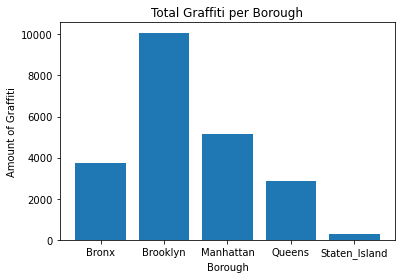

In [101]:
plt.bar(censusdata.index, censusdata.Graffiti_Total)
plt.title("Total Graffiti per Borough")
plt.xlabel("Borough")
plt.ylabel("Amount of Graffiti")

Text(0, 0.5, 'Population')

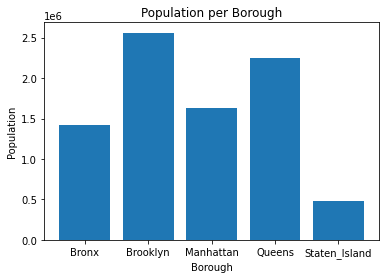

In [102]:
plt.bar(censusdata.index, censusdata.Population)
plt.title("Population per Borough")
plt.xlabel("Borough")
plt.ylabel("Population")

Text(0, 0.5, 'Amount of Households')

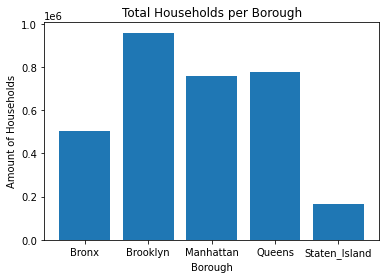

In [103]:
plt.bar(censusdata.index, censusdata.Households)
plt.title("Total Households per Borough")
plt.xlabel("Borough")
plt.ylabel("Amount of Households")

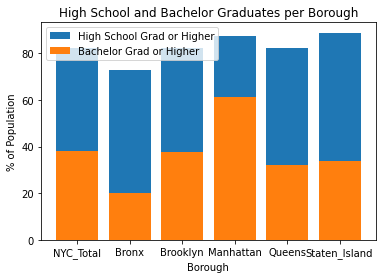

In [89]:
ax = plt.subplot(111)
ax.bar(censusdata.index, censusdata.HS_graduate, label = "High School Grad or Higher")
ax.bar(censusdata.index, censusdata.Bachelor, label = "Bachelor Grad or Higher")
ax.set_title("High School and Bachelor Graduates per Borough")
ax.set_xlabel("Borough")
ax.set_ylabel("% of Population")
ax.legend()

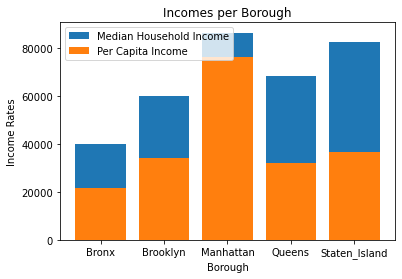

In [104]:
ax = plt.subplot(111)
ax.bar(censusdata.index, censusdata.household_income, label = "Median Household Income")
ax.bar(censusdata.index, censusdata.Per_capita_income, label = "Per Capita Income")
ax.set_title("Incomes per Borough")
ax.set_xlabel("Borough")
ax.set_ylabel("Income Rates")
ax.legend()

Text(0, 0.5, 'Poverty Percentages')

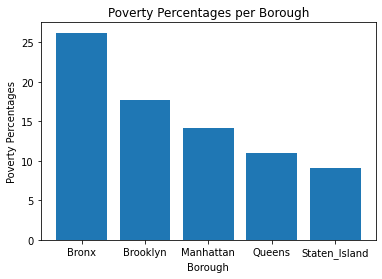

In [105]:
plt.bar(censusdata.index, censusdata.poverty)
plt.title("Poverty Percentages per Borough")
plt.xlabel("Borough")
plt.ylabel("Poverty Percentages")

****